In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import cuml
import cupy as cp

from cuml.manifold import TSNE
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tqdm import tqdm
from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<AxesSubplot:>

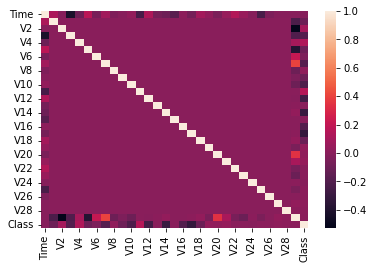

In [4]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Time', ylabel='Count'>

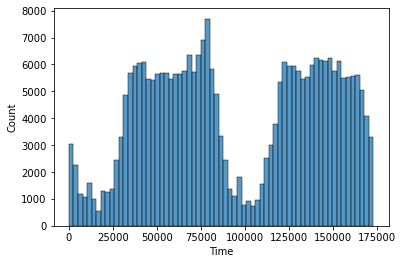

In [5]:
sns.histplot(df['Time'])

In [6]:
data_features = df.iloc[:, 1:-1]
scaler = RobustScaler()
scaled_data = pd.DataFrame(
    data=scaler.fit_transform(data_features), 
    columns=data_features.columns
)


/home/yaroslav/.conda/envs/rapids-22.06/lib/python3.9/site-packages/cuml/internals/api_decorators.py:794: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)


[W] [23:36:16.470123] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.616237,-0.098602,1.228905,0.878152,-0.217859,0.631245,0.177406,0.142432,0.334787,0.185689,...,0.910463,0.026866,0.253109,-0.320791,0.032681,0.167619,-0.241182,0.816731,-0.246091,1.783274
1,0.524929,0.143100,-0.006970,0.293974,0.087726,0.164395,-0.105740,0.117064,-0.164482,-0.074854,...,-0.019150,-0.473332,-0.602719,0.363442,-0.479557,0.225462,0.313475,-0.063781,0.026519,-0.269825
2,-0.615587,-1.002407,0.830932,0.251024,-0.344345,1.778007,0.668164,0.420388,-1.179796,0.303796,...,1.703959,0.668917,0.714254,2.974603,-0.919589,-0.515430,-0.153111,-0.350218,-0.540962,4.983721
3,-0.440239,-0.178789,0.841250,-0.529808,0.033775,1.303832,0.175637,0.662489,-1.076888,0.038374,...,-0.422194,-0.190105,-0.001408,-0.578786,-1.531963,0.944482,-0.298959,0.379163,0.382611,1.418291
4,-0.526089,0.579239,0.713861,0.265632,-0.270695,0.317183,0.491625,-0.546463,0.700808,0.855099,...,1.366227,0.048266,0.739092,-0.407980,0.126293,-0.333308,0.976221,1.347133,1.553716,0.670579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-5.321622,7.135767,-5.222589,-1.285699,-4.073679,-1.999082,-4.409307,13.588260,1.585066,4.496984,...,4.461946,0.585633,0.098124,3.314091,-0.693006,2.126512,0.532055,5.820867,6.190862,-0.296653
284803,-0.335820,-0.085979,0.967471,-0.451476,0.707747,1.142041,-0.014027,0.508439,0.512990,-0.892515,...,0.354148,0.587444,0.856848,0.076436,-1.331299,-0.933155,-0.604145,0.414680,-0.493534,0.038986
284804,0.850377,-0.261532,-1.788463,-0.337932,2.059687,2.832770,-0.299623,1.280019,0.390154,-0.396083,...,0.185279,0.630455,0.533612,-0.085005,0.754500,0.373060,-0.062034,0.019227,-0.288058,0.641096
284805,-0.115629,0.331602,0.272567,0.445763,-0.248270,0.769496,-0.645865,1.225405,0.357606,-0.309505,...,0.550857,0.710499,0.740745,-0.491472,0.103549,-0.877058,1.054357,0.663921,0.710829,-0.167680


# Outlier std

In [7]:
def outlier_std(data, col, threshold=3):
    mean = data[col].mean()
    std = data[col].std()
    up_bound = mean + threshold * std
    low_bound = mean - threshold * std
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

In [8]:
def get_column_outliers(data, columns=None, function=outlier_std, threshold=3, n_anom=1):
    if columns:
        columns_to_check = columns
    else:
        columns_to_check = data.columns
        
    outliers = pd.Series(data=[0]*len(data), index=data_features.index, name='is_outlier')
    comparison_table = {}
    
    for column in columns_to_check:
        anomalies, upper_bound, lower_bound = function(data, column, threshold=threshold)
        comparison_table[column] = [upper_bound, lower_bound, sum(anomalies), 100*sum(anomalies)/len(anomalies)]
        outliers[anomalies[anomalies].index] += 1
    
    outliers = outliers >= n_anom # сделка аномальна, если она аномальна по n_anom признакам
    
    comparison_table = pd.DataFrame(comparison_table).T
    comparison_table.columns=['upper_bound', 'lower_bound', 'anomalies_count', 'anomalies_percentage']
    comparison_table = comparison_table.sort_values(by='anomalies_percentage', ascending=False)
    
    return comparison_table, outliers

def anomalies_report(outliers):
    print("Total number of outliers: {}\nPercentage of outliers:   {:.2f}%".format(
            sum(outliers), 100*sum(outliers)/len(outliers)))    

In [9]:
data_features = df.iloc[:, :-1]
data_features.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [10]:
comparison_table, std_outliers = get_column_outliers(data_features, threshold=10)
anomalies_report(std_outliers)

Total number of outliers: 2104
Percentage of outliers:   0.74%


In [11]:
df['Time']

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

In [89]:
for n_anom in range(1, 31):
    f1_list = np.array([])
    for i in range(3, 23):
        comparison_table, std_outliers = get_column_outliers(data_features, threshold=i, n_anom=n_anom)
        new_df = df.join(std_outliers.astype(int))
        
        tp = len(new_df[(new_df['Class'] == 1)&(new_df['is_outlier'] == 1)])
        fn = len(new_df[(new_df['Class'] == 0)&(new_df['is_outlier'] == 1)])
        
        tn = len(new_df[(new_df['Class'] == 0)&(new_df['is_outlier'] == 0)])
        fp = len(new_df[(new_df['Class'] == 1)&(new_df['is_outlier'] == 0)])
        
        try:
            precision = tp/(tp+fp)
            recall = tp/(tp+fn)
            f1 = 2 * ((precision*recall)/(precision+recall))
            f1_list  = np.append(f1_list, f1)
            
        except ZeroDivisionError:
            continue
            
    print(f'n_anom={n_anom}')
    print('Max f1:')
    print(np.max(f1_list))
    print(f'n_sigmas={np.argmax(f1_list)+3}')
    print("=="*20)

n_anom=1
Max f1:
0.19663299663299663
n_sigmas=14
n_anom=2
Max f1:
0.22580645161290325
n_sigmas=13
n_anom=3
Max f1:
0.26150121065375304
n_sigmas=12
n_anom=4
Max f1:
0.2794871794871795
n_sigmas=11
n_anom=5
Max f1:
0.28222523744911804
n_sigmas=10
n_anom=6
Max f1:
0.29085872576177285
n_sigmas=9
n_anom=7
Max f1:
0.2942708333333333
n_sigmas=7
n_anom=8
Max f1:
0.3107019562715766
n_sigmas=5
n_anom=9
Max f1:
0.30749682337992373
n_sigmas=5
n_anom=10
Max f1:
0.3066298342541437
n_sigmas=5
n_anom=11
Max f1:
0.3137614678899082
n_sigmas=3
n_anom=12
Max f1:
0.31899265477439664
n_sigmas=3
n_anom=13
Max f1:
0.30626450116009285
n_sigmas=3
n_anom=14
Max f1:
0.29824561403508776
n_sigmas=3
n_anom=15
Max f1:
0.29149797570850206
n_sigmas=3
n_anom=16
Max f1:
0.2744525547445255
n_sigmas=3
n_anom=17
Max f1:
0.2511627906976744
n_sigmas=3
n_anom=18
Max f1:
0.1533219761499148
n_sigmas=3
n_anom=19
Max f1:
0.09576427255985268
n_sigmas=3
n_anom=20
Max f1:
0.034548944337811895
n_sigmas=3
n_anom=21
Max f1:
0.01964636542

KeyboardInterrupt: 

Возьмём за лучший результат при n_anom=12 и отколение в пределах n_sigmas>3

/home/yaroslav/.conda/envs/rapids-22.06/lib/python3.9/site-packages/cuml/internals/api_decorators.py:794: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return func(**kwargs)


461 492


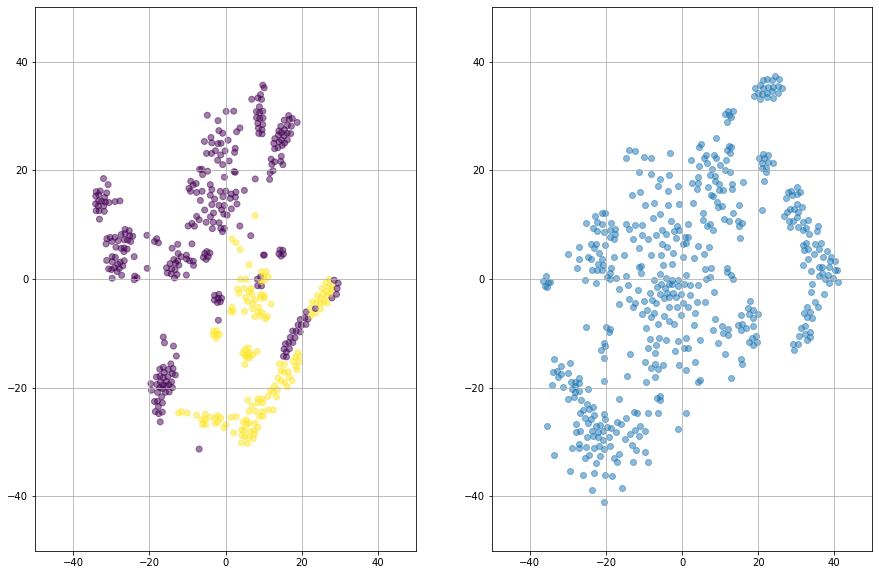

In [143]:
tsne = TSNE(n_components = 2, random_state=13)
tsne_transformed = tsne.fit_transform(scaled_data[df['Class']==1])

comparison_table, std_outliers = get_column_outliers(data_features, threshold=3, n_anom=12)

tsne_transformed_outliers = tsne.fit_transform(scaled_data[std_outliers])

fig, (ax1, ax2) = plt.subplots(1, 2)

cmap_by = df[std_outliers.astype('int')==1]['Class']

ax1.scatter(tsne_transformed_outliers[:, 0], 
            tsne_transformed_outliers[:, 1], 
            c=cmap_by,
            alpha=0.5)

ax1.set_xlim([-50, 50])
ax1.set_ylim([-50, 50])

ax2.scatter(tsne_transformed[:, 0], 
            tsne_transformed[:, 1], 
            #c=colormap[df['Class'][df['Class']==1]],
            alpha=0.5);

ax2.set_xlim([-50, 50])
ax2.set_ylim([-50, 50])

fig.set_figheight(10)
fig.set_figwidth(15)

ax1.grid()
ax2.grid()

print(sum(std_outliers), sum(df['Class']))

# Distance Outliers

In [119]:
class DistanceOutliers(BaseEstimator):
    def __init__(self, metric='euclidean', percentile=90):
        self.metric = metric
        self.percentile = percentile
        
    def fit(self, X):
        self.centroid = np.mean(X, axis=0).values.reshape(-1, 1).T
        distances_train = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        self.threshold = np.percentile(distances_train, self.percentile)
        
    def predict(self, X):
        distances = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        predictions = (distances > self.threshold).astype(int)
        return predictions

In [120]:
euclidian_model = DistanceOutliers(metric='euclidean', percentile=99)
euclidian_model.fit(df)
euclidian_outliers = euclidian_model.predict(df)
anomalies_report(euclidian_outliers)

Total number of outliers: 2849
Percentage of outliers:   1.00%


In [100]:
print(classification_report(df['Class'],euclidian_outliers.astype(int)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    284315
           1       0.00      0.00      0.00       492

    accuracy                           0.99    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      0.99      0.99    284807



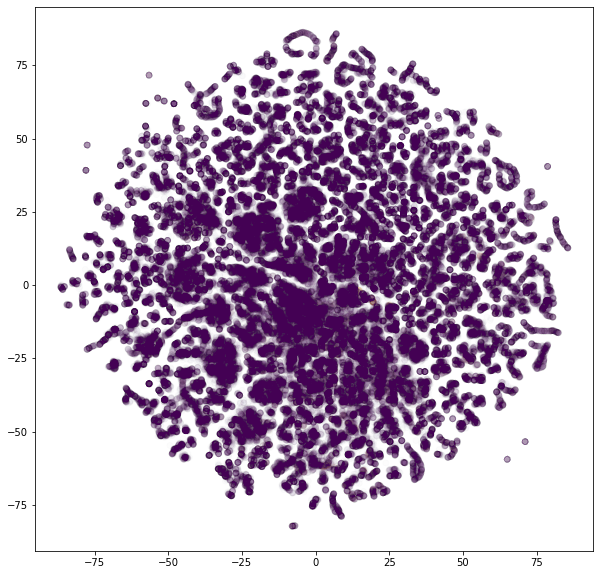

In [101]:
plt.figure(figsize=(10, 10))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c=euclidian_outliers, alpha=0.01);

# CUDA Supported DBSCAN

In [6]:
%%time

outlier_percentage = 0.05

num_clusters = []
anomaly_percentage = []

eps = 6
eps_history = [eps]

#with tqdm(total=100) as pbar:
while outlier_percentage > 0.002:    
    model = cuml.DBSCAN(eps=eps, max_mbytes_per_batch=5120).fit(scaled_data)
    labels = model.labels_
    num_clusters.append(len(np.unique(labels))-1)
    labels = np.array([1 if label == -1 else 0 for label in labels])

    # запишем предыдущий prev_outlier_perc, для обновления pbar
    prev_outlier_perc = outlier_percentage 
    outlier_percentage = sum(labels==1) / len(labels)
    eps += 0.25
    eps_history.append(eps)
    anomaly_percentage.append(outlier_percentage)
    print(outlier_percentage)

#     if prev_outlier_perc > outlier_percentage:
#         # обновим pbar на разницу outlier_perc'ов
#         pbar.update(round((prev_outlier_perc - outlier_percentage), 2)*100)

0.011200567401784366
0.009890908580196414
0.00885863058141127
0.00794924282057674
0.007096033454233919
0.006457004216890737


MemoryError: std::bad_alloc: out_of_memory: CUDA error at: /workspace/.conda-bld/work/include/rmm/mr/device/cuda_memory_resource.hpp:70: cudaErrorMemoryAllocation out of memory

In [7]:
print(eps)

7.5


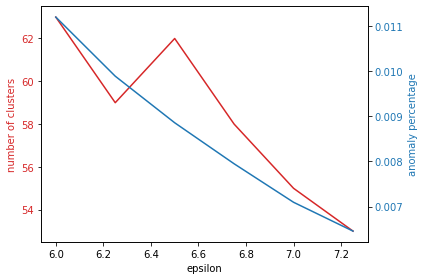

In [8]:
iterations = eps_history[:-1]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epsilon')
ax1.set_ylabel('number of clusters', color=color)
ax1.plot(iterations, num_clusters, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('anomaly percentage', color=color)  
ax2.plot(iterations, anomaly_percentage, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

In [11]:
model = cuml.DBSCAN(eps=7.25, max_mbytes_per_batch=5120)
model.fit(scaled_data)
density_outlier = np.array([1 if label == -1 else 0 for label in model.labels_])

In [14]:
from sklearn.metrics import precision_score

density_outlier = pd.Series(density_outlier)

print(len(density_outlier))
print(classification_report(df['Class'], density_outlier))

284807
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.07      0.26      0.11       492

    accuracy                           0.99    284807
   macro avg       0.53      0.63      0.55    284807
weighted avg       1.00      0.99      0.99    284807

